In [2]:
# Import packages
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

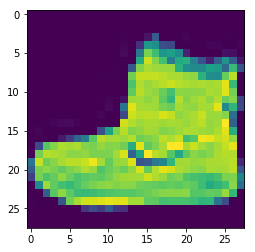

Ankle boot


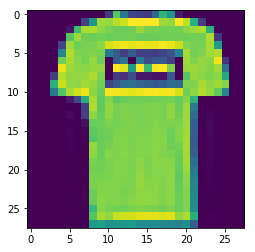

T-shirt/top


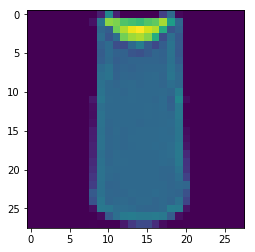

T-shirt/top


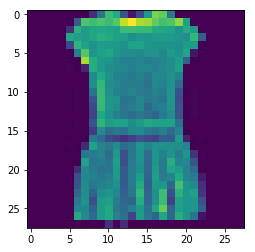

Dress


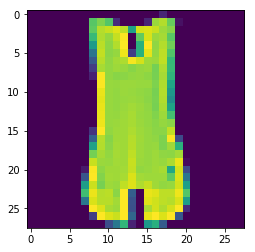

T-shirt/top


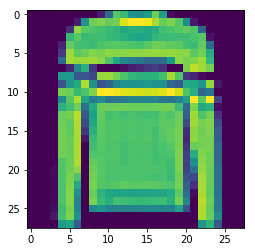

Pullover


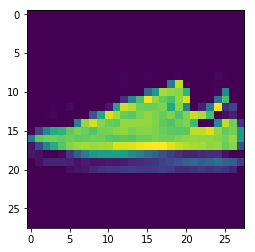

Sneaker


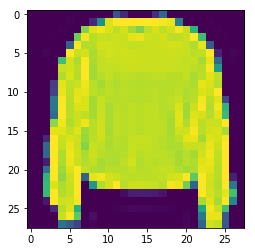

Pullover


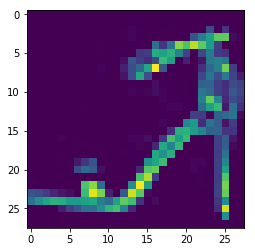

Sandal


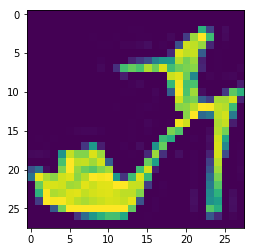

Sandal


In [3]:
train = np.load("Downloads/train.npy")
test = np.load("Downloads/test.npy")
testlabels = np.load("Downloads/testlabels.npy")
trainlabels = np.load("Downloads/trainlabels.npy")
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag", "Ankle boot"]
for i in range(10):
    img = train[i]
    plt.imshow(img)
    plt.show()
    print(labels[trainlabels[i]])

In [4]:
train2 = train
train3 = []
for image in train2:
    im = []
    for vec in image:
        for el in vec:
            im.append(el) # Put pixels into a single list
    train3.append(im) # Save images as lists (like a vector) rather than 28x28 arrays

test2 = test
test3 = []
for image in test2:
    im = []
    for vec in image:
        for el in vec:
            im.append(el)
    test3.append(im)

In [6]:
# Train decision trees with max depths ranging from 2 to 50. Store the classifiers and their accuracies.
leafCounts = []

dts = []
scores = []
losses = []

scores2 = []
losses2 = []

for depth in range(2,51,2):
    
    leafCounts.append(2**depth)
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(train3,trainlabels)
    dts.append(dt)
    
    score = dt.score(test3,testlabels)
    scores.append(score)
    losses.append(1-score)
    
    score2 = dt.score(train3,trainlabels)
    scores2.append(score2)
    losses2.append(1-score2)
    if depth == 2 or depth%10 == 0:
        print("Depth =",depth,"completed.") # Get updated after the first one, and after every 10

Depth = 2 completed.
Depth = 10 completed.
Depth = 20 completed.
Depth = 30 completed.
Depth = 40 completed.
Depth = 50 completed.


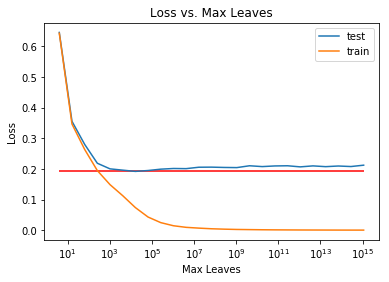

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(leafCounts,losses, label = 'test')
plt.plot(leafCounts,losses2, label = 'train')
plt.hlines(np.min(losses),np.min(leafCounts),np.max(leafCounts),color = "r")
plt.title("Loss vs. Max Leaves")
plt.xlabel("Max Leaves")
plt.ylabel("Loss")
plt.legend()
# plt.savefig('Downloads/Q4P2_Loss_vs_Max_Leaves.png')
plt.show()

In [51]:
for i in range(len(losses)):
    print(leafCounts[i],losses[i])
    if losses[i] == np.min(losses):
        print("Min ^")

4 0.6456999999999999
16 0.35540000000000005
64 0.2801
256 0.21840000000000004
1024 0.20009999999999994
4096 0.19589999999999996
16384 0.19179999999999997
Min ^
65536 0.19469999999999998
262144 0.19910000000000005
1048576 0.20130000000000003
4194304 0.20079999999999998
16777216 0.20540000000000003
67108864 0.2057
268435456 0.2047
1073741824 0.20420000000000005
4294967296 0.21020000000000005
17179869184 0.20750000000000002
68719476736 0.2096
274877906944 0.21020000000000005
1099511627776 0.2066
4398046511104 0.2098
17592186044416 0.20730000000000004
70368744177664 0.20940000000000003
281474976710656 0.2077
1125899906842624 0.21209999999999996
-11.002099841204238


In [8]:
def get_n_leaves(dt):
    n_nodes = dt.tree_.node_count
    children_left = dt.tree_.children_left
    children_right = dt.tree_.children_right
    
    n_leaves = 0
    for i in range(n_nodes):
        if children_left[i] == -1 and children_right[i] == -1:
            n_leaves += 1
    return n_leaves

In [12]:
for i in range(len(dts)):
    print("\nUsed:",get_n_leaves(dts[i]),"\nMax allowed:", leafCounts[i],"\n")


Used: 4 
Max allowed: 4 


Used: 16 
Max allowed: 16 


Used: 63 
Max allowed: 64 


Used: 222 
Max allowed: 256 


Used: 592 
Max allowed: 1024 


Used: 1199 
Max allowed: 4096 


Used: 2048 
Max allowed: 16384 


Used: 2935 
Max allowed: 65536 


Used: 3631 
Max allowed: 262144 


Used: 4042 
Max allowed: 1048576 


Used: 4282 
Max allowed: 4194304 


Used: 4435 
Max allowed: 16777216 


Used: 4563 
Max allowed: 67108864 


Used: 4648 
Max allowed: 268435456 


Used: 4726 
Max allowed: 1073741824 


Used: 4774 
Max allowed: 4294967296 


Used: 4822 
Max allowed: 17179869184 


Used: 4848 
Max allowed: 68719476736 


Used: 4855 
Max allowed: 274877906944 


Used: 4874 
Max allowed: 1099511627776 


Used: 4875 
Max allowed: 4398046511104 


Used: 4898 
Max allowed: 17592186044416 


Used: 4905 
Max allowed: 70368744177664 


Used: 4907 
Max allowed: 281474976710656 


Used: 4905 
Max allowed: 1125899906842624 



In [13]:
n_params = []

rfs = []
scoresRF = []
lossesRF = []

rfs2 = []
scores2RF = []
losses2RF = []

for depth in range(2,51,2):
    
    n_params.append(25*(2**depth))
    rf = RandomForestClassifier(n_estimators=25,max_depth=depth)
    rf.fit(train3,trainlabels)
    rfs.append(rf)
    
    scoreRF = rf.score(test3,testlabels)
    scoresRF.append(scoreRF)
    lossesRF.append(1-scoreRF)
    
    score2RF = rf.score(train3,trainlabels)
    scores2RF.append(score2RF)
    losses2RF.append(1-score2RF)
    if depth == 2 or depth%10 == 0:
        print("Depth =",depth,"completed.") # Get updated after the first one, and after every 10

Depth = 2 completed.
Depth = 10 completed.
Depth = 20 completed.
Depth = 30 completed.
Depth = 40 completed.
Depth = 50 completed.


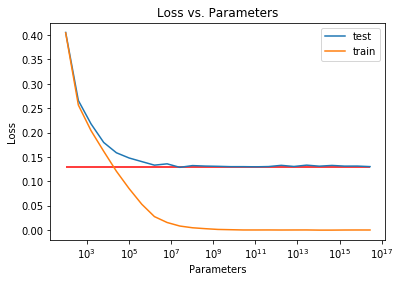

In [19]:
# Plot Loss vs parameters for random forest with fixed number of trees

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(n_params,lossesRF, label = 'test')
plt.plot(n_params,losses2RF, label = 'train')
plt.hlines(np.min(lossesRF),np.min(n_params),np.max(n_params),color = "r")
plt.title("Loss vs. Parameters")
plt.xlabel("Parameters")
plt.ylabel("Loss")
plt.legend()
# plt.savefig('Downloads/Q4P5a_Loss_vs_Parameters_Fixed_Estimators.png')
plt.show()

In [53]:
print(lossesRF)
print(losses2RF)

[0.4054, 0.2659, 0.21799999999999997, 0.17989999999999995, 0.15880000000000005, 0.1481, 0.14070000000000005, 0.13339999999999996, 0.1361, 0.12890000000000001, 0.13249999999999995, 0.13149999999999995, 0.131, 0.13029999999999997, 0.13029999999999997, 0.13, 0.13049999999999995, 0.133, 0.13070000000000004, 0.13339999999999996, 0.13129999999999997, 0.13280000000000003, 0.13139999999999996, 0.13149999999999995, 0.13039999999999996]
0.19179999999999997
[0.40445, 0.25660000000000005, 0.2041333333333334, 0.16178333333333328, 0.12095, 0.0854166666666667, 0.053333333333333344, 0.02795000000000003, 0.01585000000000003, 0.008616666666666717, 0.005066666666666664, 0.0032166666666666455, 0.0016500000000000403, 0.0010999999999999899, 0.0005500000000000504, 0.0005333333333333856, 0.0005833333333333801, 0.00046666666666661527, 0.0005333333333333856, 0.0005833333333333801, 0.00024999999999997247, 0.0002666666666666373, 0.00046666666666661527, 0.0005166666666667208, 0.0004999999999999449]


In [16]:
n_params_2 = []

rfs_n = []
scoresRF_n = []
lossesRF_n = []

rfs2_n = []
scores2RF_n = []
losses2RF_n = []

depth = 8

print("Starting.")

for n in [2,10,50,100,1000,10000]:
    
    n_params_2.append(n*(2**depth))
    rf_n = RandomForestClassifier(n_estimators=n,max_depth=depth)
    rf_n.fit(train3,trainlabels)
    rfs_n.append(rf_n)
    
    scoreRF_n = rf_n.score(test3,testlabels)
    scoresRF_n.append(scoreRF_n)
    lossesRF_n.append(1-scoreRF_n)
    
    score2RF_n = rf_n.score(train3,trainlabels)
    scores2RF_n.append(score2RF_n)
    losses2RF_n.append(1-score2RF_n)
    print("Completed", n)

Starting.
Completed 2
Completed 10
Completed 50
Completed 100
Completed 1000
Completed 10000


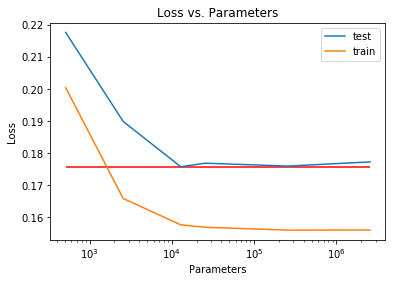

In [18]:
# Plot Loss vs parameters for random forest with fixed max leaf count per tree

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
plt.plot(n_params_2,lossesRF_n, label = 'test')
plt.plot(n_params_2,losses2RF_n, label = 'train')
plt.hlines(np.min(lossesRF_n),np.min(n_params_2),np.max(n_params_2),color = "r")
plt.title("Loss vs. Parameters")
plt.xlabel("Parameters")
plt.ylabel("Loss")
plt.legend()
# plt.savefig('Downloads/Q4P5b_Loss_vs_Parameters_Fixed_Leaves.png')
plt.show()

In [58]:
print(lossesRF_n)
print(n_params_2)
print(np.min(lossesRF_n))

[0.21760000000000002, 0.18989999999999996, 0.17579999999999996, 0.17689999999999995, 0.17600000000000005, 0.1773]
[512, 2560, 12800, 25600, 256000, 2560000]
0.17579999999999996


In [29]:
# Phase 1

p6params = []

p6rfs = []
p6scoresRF = []
p6lossesRF = []

p6scores2RF = []
p6losses2RF = []


for depth in range(2,21,2):
    
    estimators = 1
    max_leaves= 2**depth
    p6params.append([estimators,max_leaves])
    
    rf = RandomForestClassifier(n_estimators=1,max_depth=depth)
    rf.fit(train3,trainlabels)
    p6rfs.append(rf)
    
    scorerf = rf.score(test3,testlabels)
    p6scoresRF.append(scorerf)
    p6lossesRF.append(1-scorerf)
    
    score2rf = rf.score(train3,trainlabels)
    p6scores2RF.append(score2rf)
    p6losses2RF.append(1-score2rf)
    print("Completed", 2**depth)

Completed 4
Completed 16
Completed 64
Completed 256
Completed 1024
Completed 4096
Completed 16384
Completed 65536
Completed 262144
Completed 1048576


In [40]:
# Phase 2

p6p2params = []

p6p2rfs = []
p6p2scoresRF = []
p6p2lossesRF = []

p6p2scores2RF = []
p6p2losses2RF = []

depth = 20

# Save final run from previous cell, max leaves and 1 estimator
p6p2params.append([estimators,max_leaves])
p6p2rfs.append(rf)
p6p2scoresRF.append(scorerf)
p6p2lossesRF.append(1-scorerf)
p6p2scores2RF.append(score2rf)
p6p2losses2RF.append(1-score2rf)

ns=[] # Lists of numbers of estimators we will test

for i in range(1,7):
    ns.append(2**i) # 2 through 1024, doubling each time

for n in ns:
    
    estimators = n
    max_leaves= 2**depth
    p6p2params.append([estimators,max_leaves])
    
    rf = RandomForestClassifier(n_estimators=n,max_depth=depth)
    rf.fit(train3,trainlabels)
    p6p2rfs.append(rf)
    
    scorerf = rf.score(test3,testlabels)
    p6p2scoresRF.append(scorerf)
    p6p2lossesRF.append(1-scorerf)
    
    score2rf = rf.score(train3,trainlabels)
    p6p2scores2RF.append(score2rf)
    p6p2losses2RF.append(1-score2rf)
    print("Completed", n)
    print(1-scorerf)

Completed 2
0.24450000000000005
Completed 4
0.1724
Completed 8
0.15039999999999998
Completed 16
0.13649999999999995
Completed 32
0.1321
Completed 64
0.12719999999999998


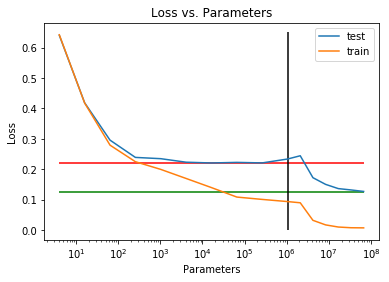

In [45]:
# Combine the lists containing all the info about phase 1 and phase 2, then create the relevant plot

num_params = []
test_losses = []
train_losses = []

for i in range(len(p6params)):
    num_params.append(p6params[i][0]*p6params[i][1])
    test_losses.append(p6lossesRF[i])
    train_losses.append(p6losses2RF[i])

for i in range(1,len(p6p2params)):  # Skip repeated run
    num_params.append(p6p2params[i][0]*p6p2params[i][1])
    test_losses.append(p6p2lossesRF[i])
    train_losses.append(p6p2losses2RF[i])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

plt.plot(num_params,test_losses,label='test')
plt.plot(num_params,train_losses,label='train')

plt.hlines(np.min(p6lossesRF),np.min(num_params),np.max(num_params),color = "r")
plt.hlines(np.min(p6p2lossesRF),np.min(num_params),np.max(num_params),color = "g")

plt.vlines(num_params[len(p6params)-1],0,0.65,color = 'k')

plt.title("Loss vs. Parameters")
plt.xlabel("Parameters")
plt.ylabel("Loss")
plt.legend()
plt.savefig('Downloads/Q4P6_Loss_vs_Parameters_Double_Descent.png')
plt.show()

In [62]:
lossesRF_new = []
for i in range(10):
    rf_new = RandomForestClassifier(n_estimators=int(2048/(2**8)),max_depth=8)
    rf_new.fit(train3,trainlabels)

    scoreRF_new = rf_new.score(test3,testlabels)
    lossRF_new = 1-scoreRF_new
    lossesRF_new.append(lossRF_new)
    print(i)
print(np.mean(lossesRF_new))

0
1
2
3
4
5
6
7
8
9
0.18837
